In [ ]:
# https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html
# Bir makina öğrenmesi modelinin, eğitim verisi üzerindeki başarı performansı düşük ise UNDERFITTING,
# Bir makina öğrenmesi modelinin, eğitim verisi üzerindeki başarı performansı yüksek ise OVERFITTING
# UNDERFITTING ve OVERFITTING bir model için istenmeyen bir durumudur. Bu tip modeller, eğitim verisinde
# yer almayan farklı bir veri ile karşılaştığında başarılı tahmin yapamazlar.
# Başarılı bir model, eğitim verisi üzerinde bir genelleştirme yapmayı başarmış olmalıdır.

## XGBOOST Algoritması

In [2]:
# https://www.veribilimiokulu.com/xgboost-nasil-calisir/
# https://www.datacamp.com/community/tutorials/xgboost-in-python

In [3]:
# Python kurulum:
# pip install xgboost

In [7]:
from sklearn.datasets import load_boston
data = load_boston()

In [9]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [11]:
data.data.shape

(506, 13)

In [13]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
import pandas as pd

In [18]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
df['PRICE'] = data.target

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# XGBOOST
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

In [24]:
X = df.drop('PRICE',axis=1)
y = df['PRICE'] # hedef değişkeni, LABEL, TARGET

In [25]:
data_dmatrix = xgb.DMatrix(data=X, label=y) # DMatrix veri yapısına dönüştür

In [26]:
# eğitim ve test ayrımı
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
# https://xgboost.readthedocs.io/en/stable/python/python_api.html
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror', 
    eta=0.1, 
    colsample_bytree = 0.5,
    n_estimators = 10)

In [30]:
xg_reg.fit(X_train, y_train) # model fit

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
tahminler = xg_reg.predict(X_test)

In [32]:
hata = np.sqrt(mean_squared_error(y_test, tahminler))

In [33]:
print(hata)

8.812454670974242


In [38]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [40]:
# k-fold Cross Validation
# https://www.veribilimiokulu.com/bir-bakista-k-fold-cross-validation/
 
params = {"objective":"reg:squarederror", 
          "eta":0.1, 
          "alpha": 10, 
          "colsample_bytree" : 0.5}

cv_sonuclar = xgb.cv(dtrain=data_dmatrix, 
                     params = params, 
                     nfold=5, 
                     metrics="rmse",
                     early_stopping_rounds = 10,
                     as_pandas=True,
                     num_boost_round=50)

In [41]:
cv_sonuclar.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.719200,0.154732,21.746423,0.659469
1,19.736854,0.097815,19.823742,0.668582
2,17.932790,0.085524,18.068969,0.632392
3,16.308551,0.076897,16.450750,0.613027
4,14.839995,0.085793,15.036332,0.644858


In [44]:
cv_sonuclar.shape

(50, 4)

In [45]:
cv_sonuclar.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,1.818629,0.065300,3.585880,0.858343
46,1.791018,0.066316,3.579209,0.858244
47,1.762910,0.064427,3.569791,0.853949
48,1.736772,0.062117,3.560105,0.850136
49,1.711574,0.062601,3.553515,0.850238


In [46]:
# Görselleştirme ve Önemli Değişkenlerin Bulunması

xg_reg = xgb.train(params = params, dtrain = data_dmatrix, num_boost_round=10)

In [47]:
import matplotlib.pyplot as plt

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

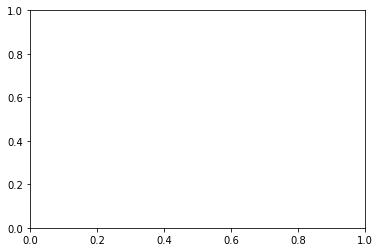

In [51]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

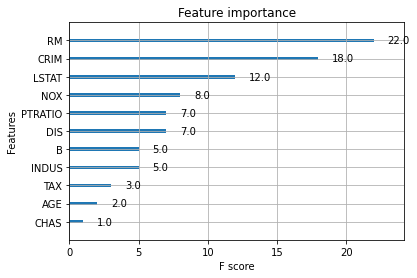

In [52]:
xgb.plot_importance(xg_reg)